In [1]:
#imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

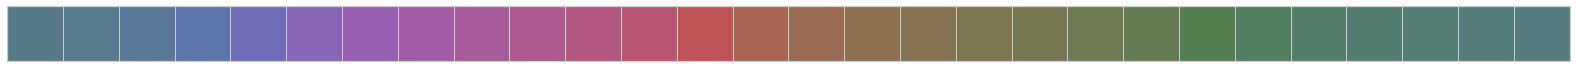

In [4]:
#set theme 
cmap=sns.diverging_palette(220, 20, as_cmap=True)
sns.set(style='whitegrid',palette=sns.husl_palette(28, s=.5,h=.6,l=.5))
sns.palplot(sns.husl_palette(28, s=.5,h=.6,l=.5))

In [5]:
#read cleaned data

In [6]:
data = pd.read_csv('datasets/train_cleaned.csv')

In [7]:
data.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,0.0,13517,Pave,None,2,Lvl,1,CulDSac,...,0,0,0,0,5,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,None,2,Lvl,1,CulDSac,...,0,0,0,0,5,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,None,1,Lvl,1,Inside,...,0,0,0,0,5,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,None,1,Lvl,1,Inside,...,0,0,0,0,5,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,None,2,Lvl,1,Inside,...,0,0,0,0,5,0,3,2010,WD,138500


In [9]:
data.info() #summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2051 non-null   int64  
 1   MS Zoning        2051 non-null   object 
 2   Lot Frontage     2051 non-null   float64
 3   Lot Area         2051 non-null   int64  
 4   Street           2051 non-null   object 
 5   Alley            2051 non-null   object 
 6   Lot Shape        2051 non-null   int64  
 7   Land Contour     2051 non-null   object 
 8   Utilities        2051 non-null   int64  
 9   Lot Config       2051 non-null   object 
 10  Land Slope       2051 non-null   int64  
 11  Neighborhood     2051 non-null   object 
 12  Condition 1      2051 non-null   object 
 13  Condition 2      2051 non-null   object 
 14  Bldg Type        2051 non-null   object 
 15  House Style      2051 non-null   object 
 16  Overall Qual     2051 non-null   int64  
 17  Overall Cond  

In [1]:
#PLOT heatmap to see overall correlation of the data
#note: we are only able to view numerical data
#categorical data is not being considered in this plot

<AxesSubplot:>

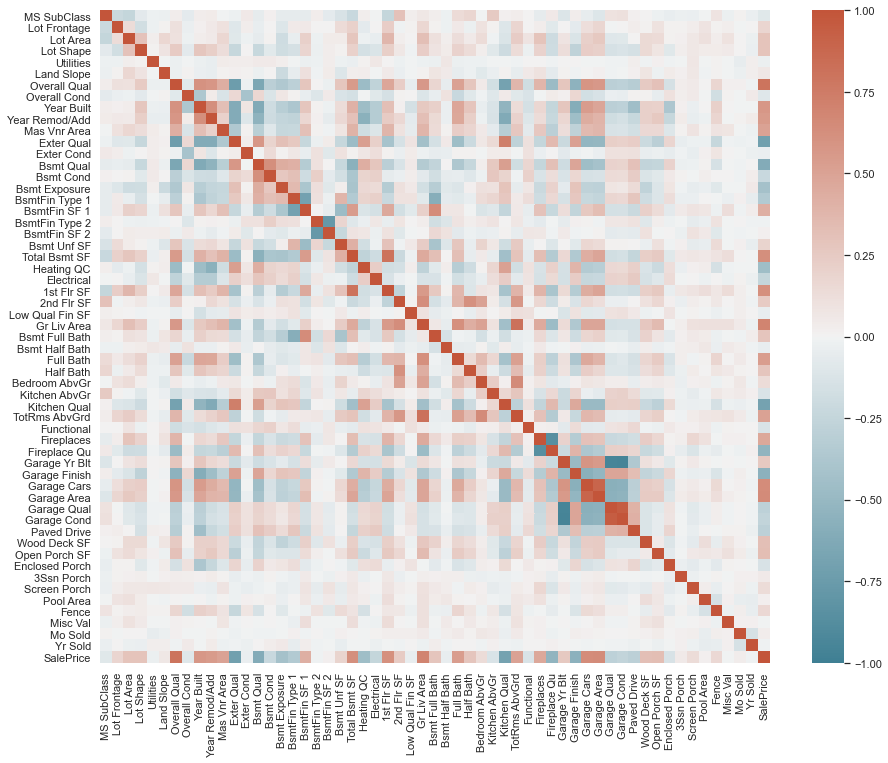

In [8]:
fig = plt.figure(figsize=(15,12))

sns.heatmap(data.corr(),cmap=cmap,vmax=1,vmin=-1,yticklabels=True,xticklabels=True)

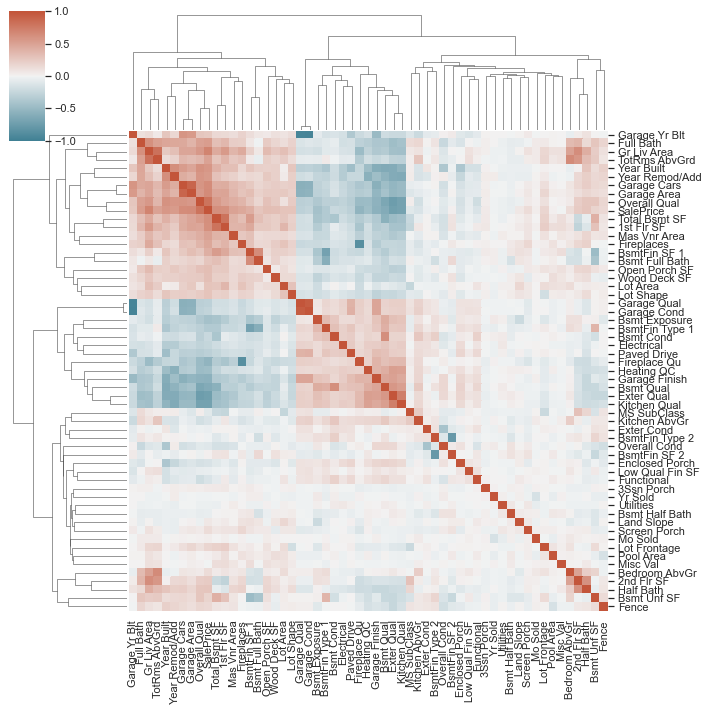

In [9]:
#correlation betweens various features

sns.clustermap(data.corr(),cmap=cmap,vmax=1,vmin=-1,yticklabels=True,xticklabels=True);
#looks like there are some features that are highly correlated
#may consider removing them later to prevent multicollinearity

In [10]:
data.corr()['SalePrice']

MS SubClass       -0.087335
Lot Frontage       0.181456
Lot Area           0.296566
Lot Shape          0.294542
Utilities         -0.026404
Land Slope         0.063136
Overall Qual       0.800207
Overall Cond      -0.097019
Year Built         0.571849
Year Remod/Add     0.550370
Mas Vnr Area       0.503579
Exter Qual        -0.712146
Exter Cond        -0.036418
Bsmt Qual         -0.612188
Bsmt Cond         -0.225075
Bsmt Exposure     -0.424863
BsmtFin Type 1    -0.350362
BsmtFin SF 1       0.423856
BsmtFin Type 2    -0.014070
BsmtFin SF 2       0.016432
Bsmt Unf SF        0.190861
Total Bsmt SF      0.629303
Heating QC        -0.458354
Electrical        -0.247842
1st Flr SF         0.618486
2nd Flr SF         0.248452
Low Qual Fin SF   -0.041594
Gr Liv Area        0.697038
Bsmt Full Bath     0.283332
Bsmt Half Bath    -0.045290
Full Bath          0.537969
Half Bath          0.283001
Bedroom AbvGr      0.137067
Kitchen AbvGr     -0.125444
Kitchen Qual      -0.692336
TotRms AbvGrd      0

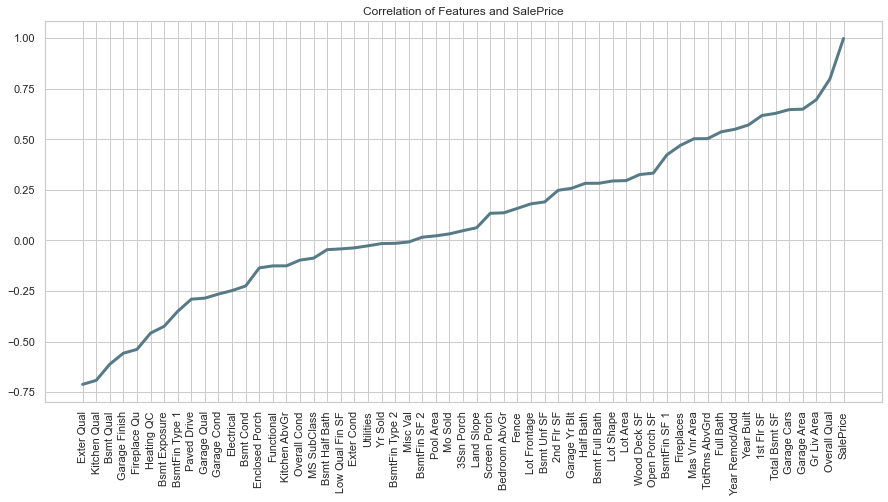

In [11]:
#plot chart to see which features are most highly correlated with saleprice
fig = plt.figure(figsize=(15,7))
sns.lineplot(x=data.corr()['SalePrice'].sort_values().index, y = data.corr()['SalePrice'].sort_values().values,linewidth=3)
plt.xticks(rotation=90)
plt.title('Correlation of Features and SalePrice');

In [12]:
#from this we can see that: 
#features like exter qual, kitchen qual, bsmt qual have a highly negative correlation to sale price
#things like farage cars, gr liv area, overall qual have a high positive correlation with sale price
#from this graph, we can see that the feature Misc Val has no relation to the sale price
#later when we perform regularization, some of these features with low correlation can be removed

#note: we are only able to view numerical data
#categorical data is not being considered in this plot

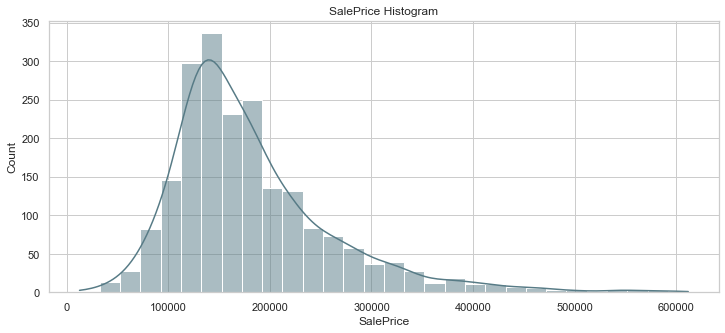

In [13]:
#plot housing price histogram to see if it is normally distributed
fig = plt.figure(figsize=(12,5))
sns.histplot(data['SalePrice'],kde=True,bins=30)
plt.title('SalePrice Histogram');

In [14]:
#histogram shows that sale prices have some extreme high values and is not normally distributed
#looks like sales data has a lot of outliers
#plot a boxplot to confirm this

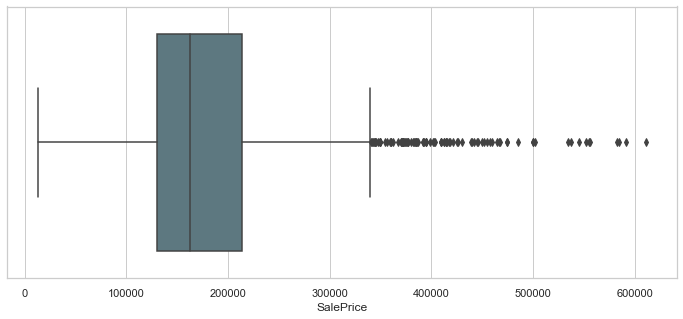

In [15]:
fig = plt.figure(figsize=(12,5))
sns.boxplot(x=data['SalePrice']);

In [16]:
#boxplot is showing the same thing, there are many extremely high priced houses
#try to log the sale prices

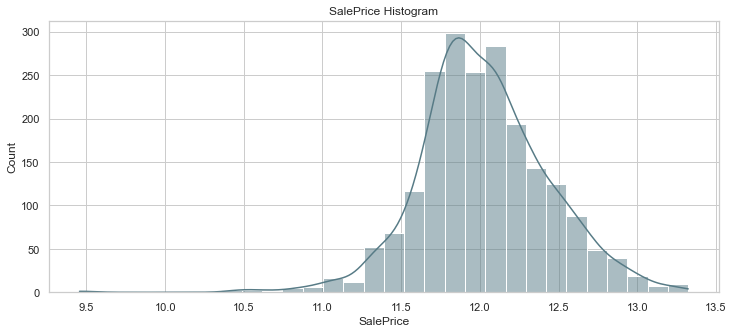

In [17]:
fig = plt.figure(figsize=(12,5))
sns.histplot(np.log(data['SalePrice']),kde=True,bins=30)
plt.title('SalePrice Histogram');

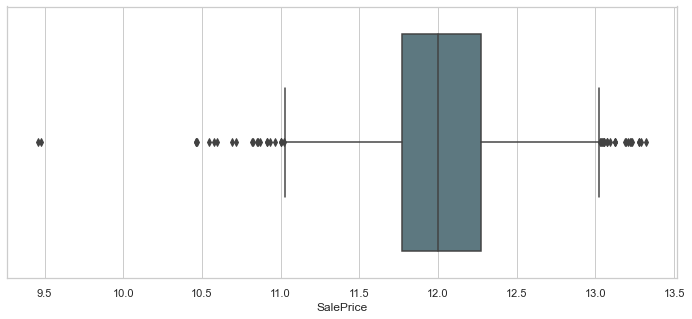

In [18]:
fig = plt.figure(figsize=(12,5))
sns.boxplot(x=np.log(data['SalePrice']));

In [19]:
#after applying a log on the SalePrice, the data looks more normally distributed
#however, we still have outliers, now on both sides
#we have 2 extreme outliers -> very cheap houses

In [20]:
data[np.log(data['SalePrice'])<9.5]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
183,20,A (agr),80.0,14584,Pave,None,1,Low,1,Inside,...,0,0,0,0,5,0,2,2008,WD,13100
1628,30,RM,68.0,9656,Pave,None,1,Lvl,1,Inside,...,0,0,0,0,5,0,6,2010,WD,12789


In [21]:
#train the model with both the original saleprice and log saleprice later to see which gets a better result

In [22]:
#EDA for categorical data

In [23]:
data.select_dtypes(include='object').columns

Index(['MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air',
       'Garage Type', 'Sale Type'],
      dtype='object')

In [24]:
#plot a few of the categorical data to see if they have any correlation with sale price
#neighbourhood seems like it will have a strong correlation on saleprice
#plot to find out

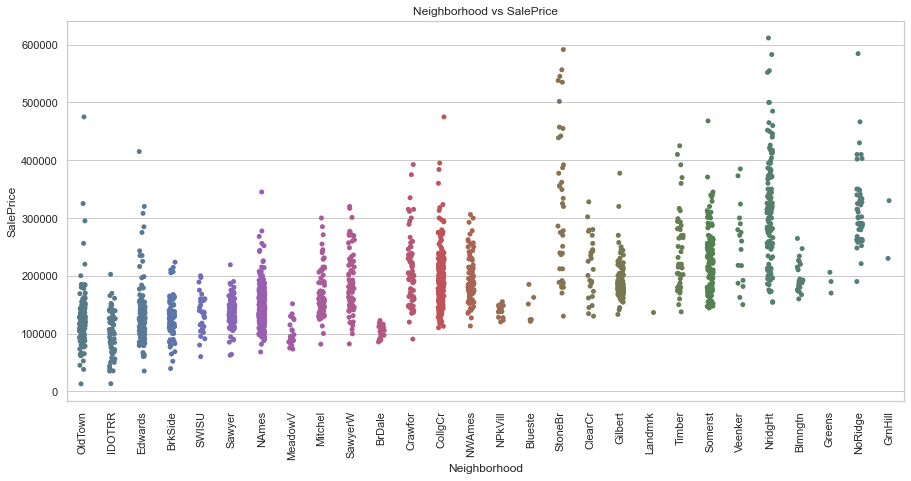

In [25]:
fig = plt.figure(figsize=(15,7))
sns.stripplot(x='Neighborhood',y='SalePrice',data=data.sort_values(by='SalePrice'))
plt.xticks(rotation=90)
plt.title('Neighborhood vs SalePrice');

In [26]:
#looks like there is a correlation between neighbourhood and saleprice

In [27]:
#see if house style has any effect on sale price

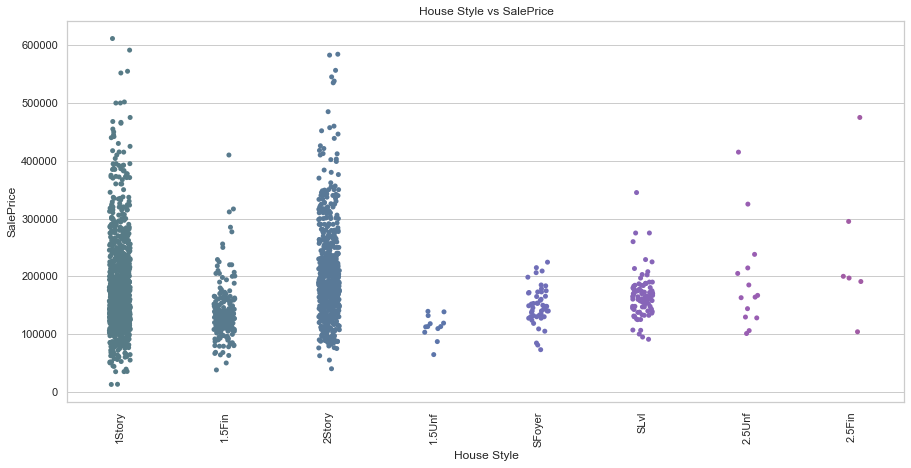

In [28]:
fig = plt.figure(figsize=(15,7))
sns.stripplot(x='House Style',y='SalePrice',data=data.sort_values(by='SalePrice'))
plt.xticks(rotation=90)
plt.title('House Style vs SalePrice');

In [29]:
#see if house style has any effect on sale price

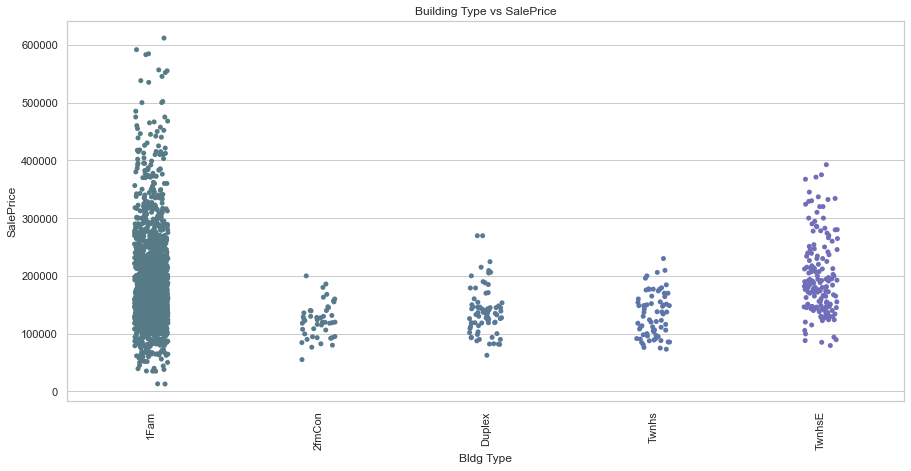

In [30]:
fig = plt.figure(figsize=(15,7))
sns.stripplot(x='Bldg Type',y='SalePrice',data=data.sort_values(by='SalePrice'))
plt.xticks(rotation=90)
plt.title('Building Type vs SalePrice');

In [31]:
#categorical data cannot be ignored
#they are important predictors
#categorical data have been dummified in the earlier workbook and will be used

In [32]:
#for numerical data:
#from above graph, we saw that overall quality had a very high correlation score with saleprice
#plot boxplot to find out

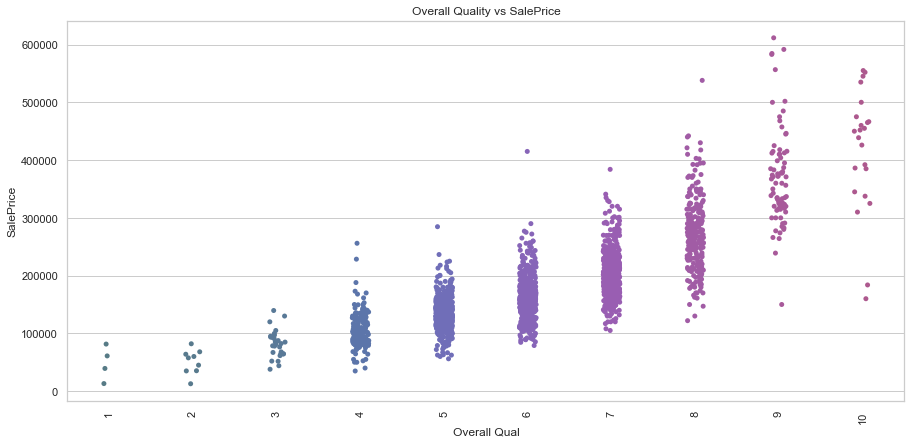

In [33]:
fig = plt.figure(figsize=(15,7))
sns.stripplot(x='Overall Qual',y='SalePrice',data=data.sort_values(by='SalePrice'))
plt.xticks(rotation=90)
plt.title('Overall Quality vs SalePrice');

In [34]:
#from chart above, overall quality seems to have a high correlation with sale price

In [35]:
Y=data['SalePrice']

In [36]:
Y

0       130500
1       220000
2       109000
3       174000
4       138500
         ...  
2046    298751
2047     82500
2048    177000
2049    144000
2050    189000
Name: SalePrice, Length: 2051, dtype: int64

In [37]:
logY = np.log(Y)

In [38]:
logY

0       11.779129
1       12.301383
2       11.599103
3       12.066811
4       11.838626
          ...    
2046    12.607366
2047    11.320554
2048    12.083905
2049    11.877569
2050    12.149502
Name: SalePrice, Length: 2051, dtype: float64

In [ ]:
#Does the student address whether or not they are likely to be able to answer their problem statement with the provided data given what they've discovered during EDA?

#problem statement: 
#Develop a prediction model that can assist real estate agents to giving the best price prediction of the house sale price. This model can also be used for real estate agents to advice homeowners on how to increase their home's sale price.

#from our EDA, we can see which features impact SalePrice
#however, how much does these features impact SalePrice? We cannot answer this now
#We will need to develop our machine learning model